

# Project: No-show appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#loading the data
no_show = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
no_show.shape

(110527, 14)

In [4]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no nulls in the data.
Need to change:
1)PatientId, and ApointmentID are float and int data type.
2)ScheduledDay, and AppointmentDay are object data type

In [5]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
no_show['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [7]:
no_show['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Need to change:
Handcap column has values bigger than 1.
No-show column has two values No and Yes.
There are rows with Age less than 0.

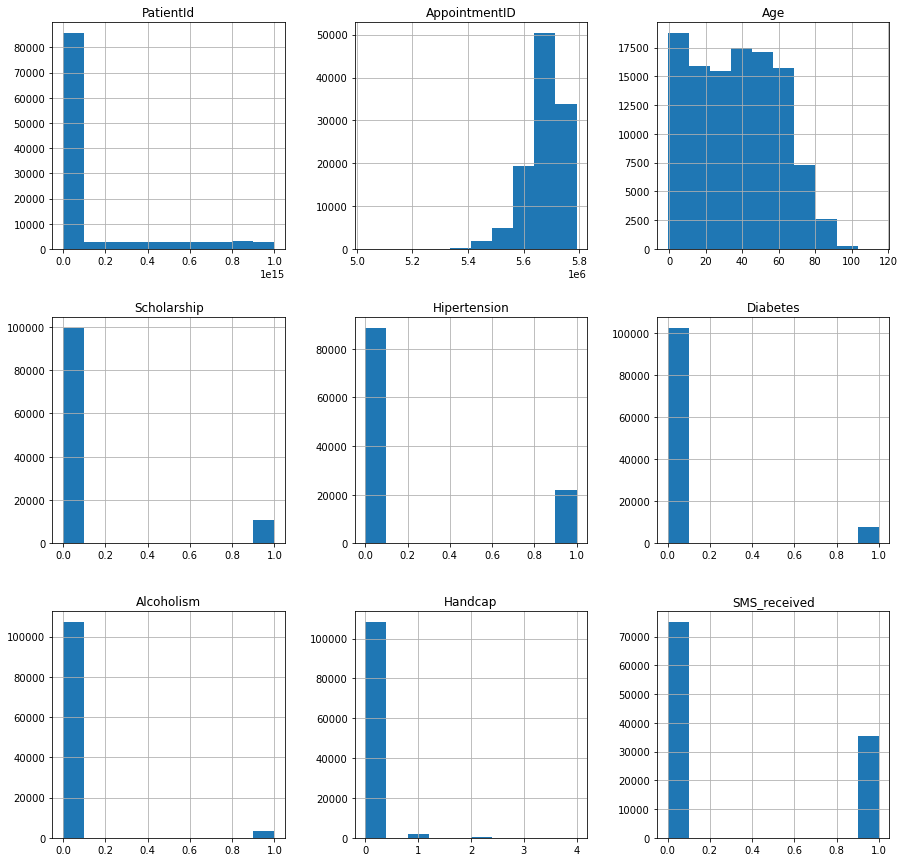

In [8]:
no_show.hist(figsize=(15,15));

Age is right-skewed which means that most people are less than 60 years old.
Columns such as Handcap, Alcoholism and SMS-received are binary values.

### Data Cleaning

In [9]:
#changing the data type of PatientId, AppointmentID, ScheduledDay, and AppointmentDay
no_show = no_show.astype({"ScheduledDay":"datetime64", "AppointmentDay":"datetime64" , "PatientId":"object" , "AppointmentID":"object"})
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

In [10]:
#creating a column which contains the time that the patient scheduled his appointment at
no_show['ScheduledTime'] = no_show['ScheduledDay'].dt.hour
no_show['ScheduledTime']

0         18
1         16
2         16
3         17
4         16
          ..
110522     9
110523     7
110524    16
110525    15
110526    13
Name: ScheduledTime, Length: 110527, dtype: int64

In [11]:
#creating a column wich contains the days between scheduling the appointment and the appointment date
no_show['ScheduledDay']=pd.to_datetime(no_show['ScheduledDay']).dt.strftime('%Y-%m-%d')
no_show['DaysBetween']= (pd.to_datetime(no_show['AppointmentDay']) - pd.to_datetime(no_show['ScheduledDay'])).dt.days
no_show['DaysBetween'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

There are rows with scheduled date behind the appointment date which I will drop.

In [12]:
no_show.drop(no_show[no_show.DaysBetween < 0].index, inplace=True)
no_show['DaysBetween'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

In [13]:
#Making all values more than 1 in handcap column = 1
no_show.loc[no_show.Handcap > 1, 'Handcap'] = 1
no_show['Handcap'].value_counts()

0    108283
1      2239
Name: Handcap, dtype: int64

In [14]:
#making the values of No-show column 0 or 1
no_show = no_show.replace({"No-show" : {"No" : 0 , "Yes" : 1}})
no_show['No-show'].value_counts()

0    88208
1    22314
Name: No-show, dtype: int64

In [15]:
#Drop outliers in age column
no_show.drop(no_show[no_show.Age < 0].index, inplace=True)
no_show.drop(no_show[no_show.Age > 90].index, inplace=True)
no_show['Age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 86], dtype=int64)

ScheduledTime and DaysBetween columns have been added containing the time and date of scheduling the appointment.
Datatypes and values have been corrected. I have droped unrealistic Age outliers so that I can do analysis on the data.

<a id='eda'></a>
## Exploratory Data Analysis



### Finding the relation between No-show and other variables

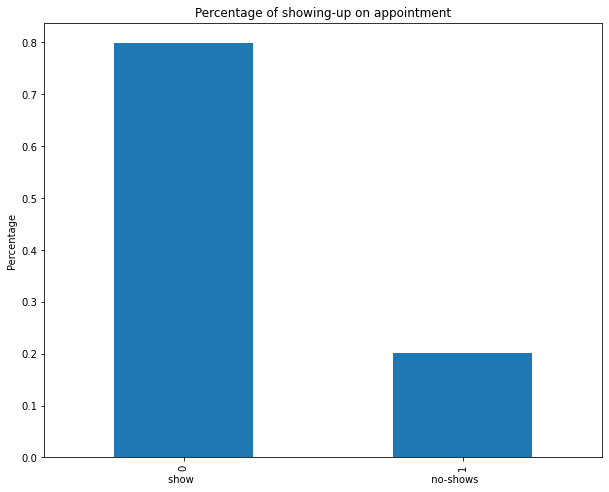

In [16]:
total_number = no_show['No-show'].count()
percentage= no_show.groupby('No-show').count()['PatientId'] / total_number
percentage.plot.bar(figsize= (10,8));
plt.title('Percentage of showing-up on appointment')
plt.xlabel('show                                                                            no-shows')
plt.ylabel('Percentage');

20% of people did not show up on appointment.

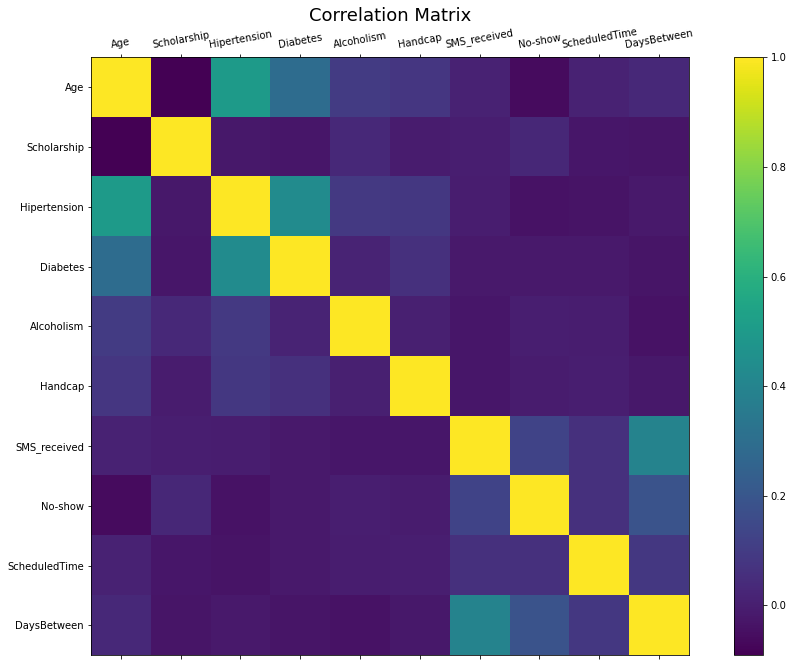

In [17]:
plt.figure(figsize=(16, 11))
plt.matshow(no_show.corr(), fignum=0)
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(range(no_show.select_dtypes(['number']).shape[1]), no_show.select_dtypes(['number']).columns, rotation=10)
plt.yticks(range(no_show.select_dtypes(['number']).shape[1]), no_show.select_dtypes(['number']).columns)
plt.colorbar();

There are correlation between No-show and DaysBetween, No-show and Age.

In [18]:
#Spliting the data into two dataframes based on show and no-show
Show = no_show[no_show['No-show'] == 0]
NoShow =no_show[no_show['No-show'] == 1]

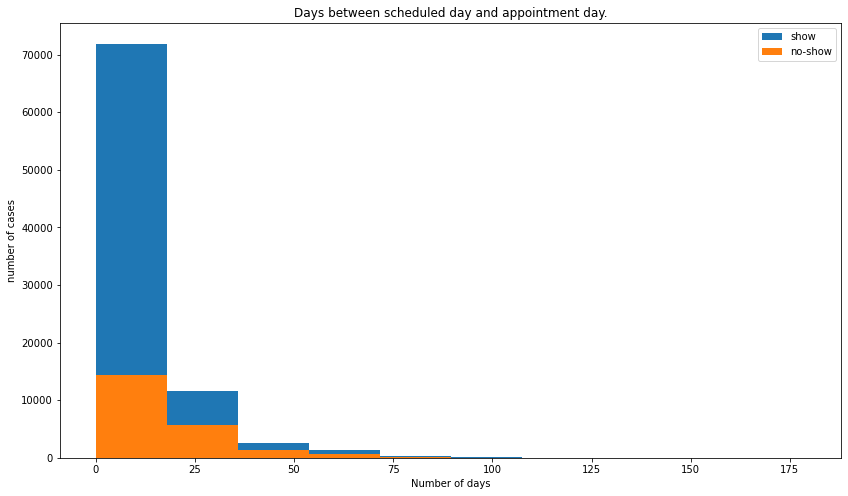

In [19]:
ax= Show['DaysBetween'].hist(figsize= (14,8))
ax= NoShow['DaysBetween'].hist(figsize= (14,8))
plt.legend(['show', 'no-show'])
ax.set_title('Days between scheduled day and appointment day.')
ax.set_xlabel('Number of days')
ax.set_ylabel('number of cases');
ax.grid()

The more the days are between scheduled day and appointment day, the more likely the person would not show-up.

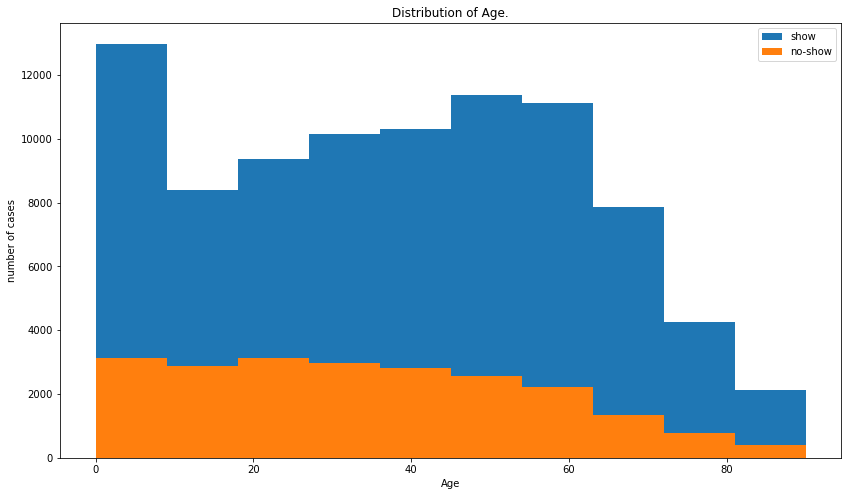

In [20]:
ax= Show['Age'].hist(figsize= (14,8))
ax= NoShow['Age'].hist(figsize= (14,8))
plt.legend(['show', 'no-show'])
ax.set_title('Distribution of Age.')
ax.set_xlabel('Age')
ax.set_ylabel('number of cases');
ax.grid()

In [21]:
no_show.groupby('No-show')['Age'].mean()

No-show
0    37.635009
1    34.151941
Name: Age, dtype: float64

The mean of age of people showing up in their appointment is more than the mean of age of people not showing.

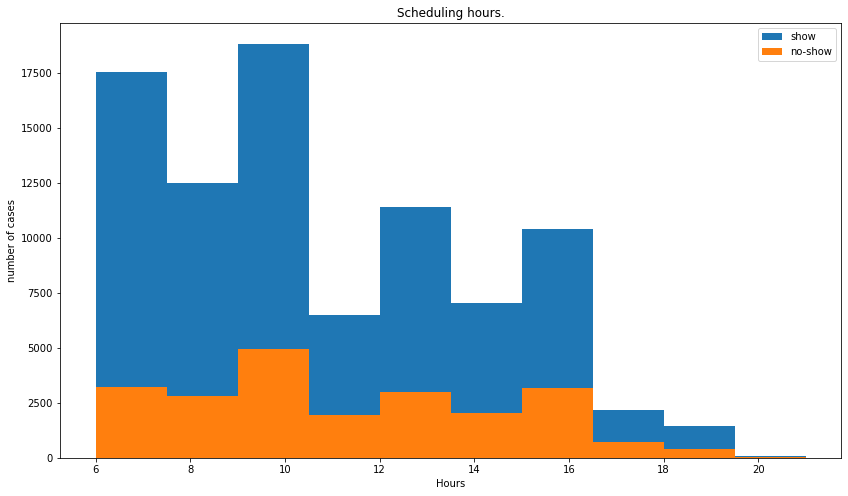

In [22]:
ax= Show['ScheduledTime'].hist(figsize= (14,8))
ax= NoShow['ScheduledTime'].hist(figsize= (14,8))
plt.legend(['show', 'no-show'])
ax.set_title('Scheduling hours.')
ax.set_xlabel('Hours')
ax.set_ylabel('number of cases');
ax.grid()

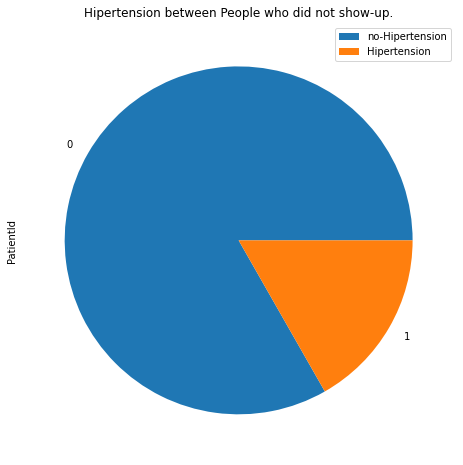

In [23]:
total_number = NoShow['Hipertension'].count()
percentage= NoShow.groupby('Hipertension').count()['PatientId'] / total_number
percentage.plot.pie(figsize= (10,8));
plt.title('Hipertension between People who did not show-up.')
plt.legend(['no-Hipertension', 'Hipertension'])

Having Hipertension has no relation to not showing-up

<a id='conclusions'></a>
## Conclusions

There are 20% of the patients didn't attend their appoinments by searching the data and the relations between variables.i found out that there are correlation between No-show and DaysBetween, No-show and Age, I found out that if the days-gap between appointed and scheduling dates are bigger the more the patient will not show-up on appointment. I found out that the mean of age of people showing up in their appointment is more than the mean of age of people not showing.
#### Limitations:
There are limitations that made it hard to apply perfect analysis on this data some of them are:
1) A lot of rows has 0 on Age column which means that age came out of equation or it is false data.
2) If the neighbourhood of the patient was included with the neighbourhood of the clincs/hospitals would make it posible for more location based analysis
3) More recorded data would help make good prediction and analysis
4) More variables included would make it easier for more analysis